In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Importing the dataset
dataset = pd.read_csv('Admission.csv')
y = dataset.pop('Admission')
X = dataset

In [ ]:
dataset.columns

Index(['Grad_marks', 'Ent_Marks', 'Uni_Grad', 'Place'], dtype='object')

In [ ]:
dataset.head()


,Grad_marks,Ent_Marks,Uni_Grad,Place
0,29.5,43.8,1,Urban
1,13.9,49.5,3,Urban
2,35.2,73.8,1,Urban
3,56.5,54.9,1,Urban
4,17.5,41.1,4,Rural


In [ ]:
dataset.shape


(100, 4)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Grad_marks  100 non-null    float64
 1   Ent_Marks   100 non-null    float64
 2   Uni_Grad    100 non-null    int64  
 3   Place       100 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


In [ ]:
dataset.isnull().sum()

Grad_marks    0
Ent_Marks     0
Uni_Grad      0
Place         0
dtype: int64

Look like our data is complete one. There is no NaN values and also features type are proper

Now calculate the some statistical data like percentile,mean and std of the numerical values of the Series or data frame by using Desscribe() Method

In [ ]:
dataset.describe()

,Grad_marks,Ent_Marks,Uni_Grad
count,100.000000,100.000000,100.000000
mean,40.189000,47.490000,2.460000
std,17.722592,18.285837,1.077033
min,10.300000,15.900000,1.000000
25%,27.850000,33.300000,1.750000
50%,38.200000,47.400000,3.000000
75%,55.600000,62.400000,3.000000
max,71.800000,76.800000,4.000000


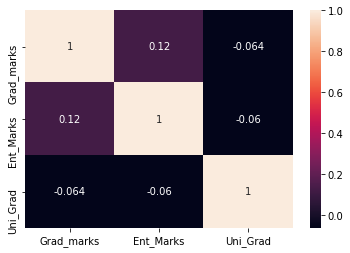

In [ ]:
corr_matrix=dataset.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

From above we got to knwo many things about our data

We can see that Ent_marks  and grad_marks are highly positive correlated to each other as expected
We don't have any values which are negative correlated to each other

Text(0.5, 1.0, 'Place')

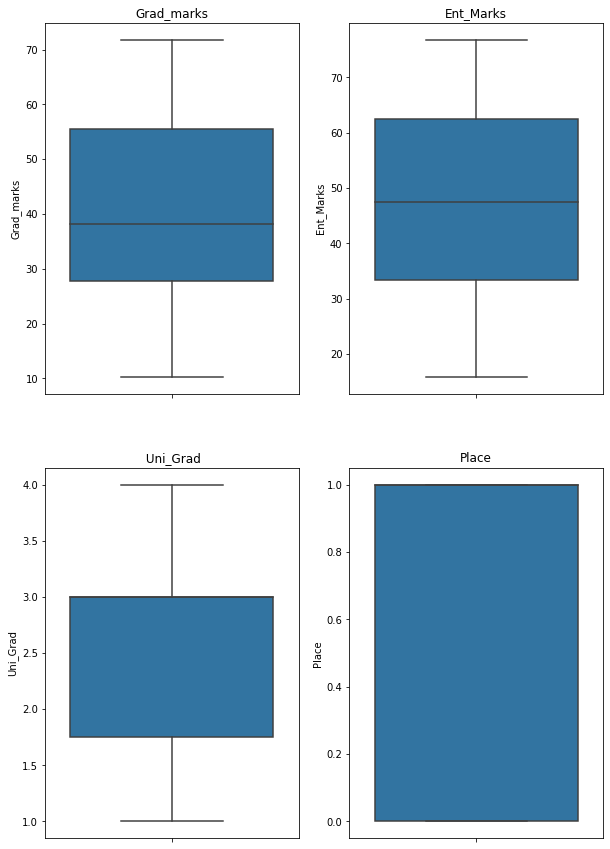

In [ ]:
#box plot
fig, ax = plt.subplots(2, 2, figsize=(10, 15))
bp=sns.boxplot(y=dataset.Grad_marks,ax=ax[0, 0])
ax[0, 0].set_title('Grad_marks')

bp=sns.boxplot(y=dataset.Ent_Marks,ax=ax[0, 1])
ax[0, 1].set_title('Ent_Marks')

bp=sns.boxplot(y=dataset.Uni_Grad,ax=ax[1, 0])
ax[1,0].set_title(' Uni_Grad')

bp=sns.boxplot(y=dataset.Place,ax=ax[1,1])
ax[1, 1].set_title('Place')




So we can clearly see that we don't have any outlier.So it's clear that the student who have high score will have higher chances for admission

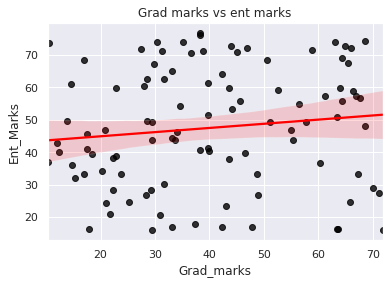

In [ ]:
ax = sns.regplot(x="Grad_marks", y="Ent_Marks", data=dataset , scatter_kws = {'color':'black'} , line_kws = {'color':'red'})
plt.title("Grad marks vs ent marks")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder 
#
le = LabelEncoder() 
#
X['Place']= le.fit_transform(X['Place']) 


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 42,probability=True)
classifier.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = classifier.predict(X)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
cm

array([[88,  0],
       [12,  0]])

In [ ]:
# finding probabilities
y_pred_prob=classifier.predict_proba(X)
prob=y_pred_prob[:,1]

In [ ]:
y_pred_final = pd.DataFrame({'Result':y.values, 'Result_Prob':prob})
y_pred_final['predicted'] = y_pred_final.Result_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [ ]:
#threshold is 0.5
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_final.Result, y_pred_final.predicted )
cm

array([[88,  0],
       [12,  0]])

In [ ]:
#here zero True Positives, hence its not correct solution

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_train=accuracy_score(y, y_pred_final.predicted)


TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
SENS=TP / float(TP+FN)

SENS

0.0

In [ ]:
# Let us calculate specificity
SPEC=TN / float(TN+FP)

SPEC

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score

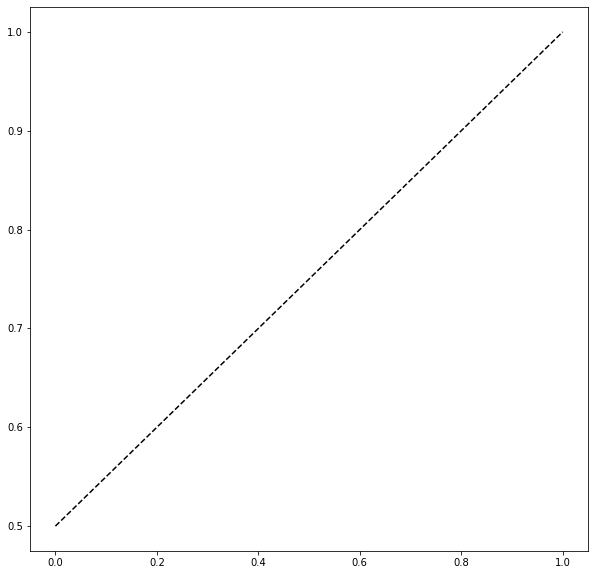

In [ ]:
#An ROC curve demonstrates several things:

#It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
#The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

#The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0.5, 1], 'k--')

In [ ]:
#ROC Function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = roc_curve( y_pred_final.Result, y_pred_final.Result_Prob, drop_intermediate = False )

type(thresholds)
thresholds.shape
fpr.shape
tpr.shape

(101,)

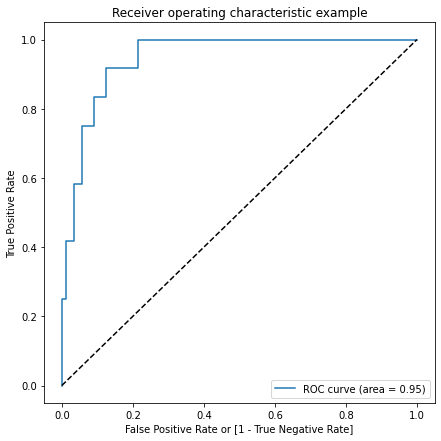

In [ ]:
draw_roc(y_pred_final.Result, y_pred_final.Result_Prob)


In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/200 for x in range(200)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Result_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

,Result,Result_Prob,predicted,0.0,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06,0.065,0.07,0.075,0.08,0.085,0.09,0.095,0.1,0.105,0.11,0.115,0.12,0.125,0.13,0.135,0.14,0.145,0.15,0.155,0.16,0.165,0.17,0.175,0.18,...,0.8,0.805,0.81,0.815,0.82,0.825,0.83,0.835,0.84,0.845,0.85,0.855,0.86,0.865,0.87,0.875,0.88,0.885,0.89,0.895,0.9,0.905,0.91,0.915,0.92,0.925,0.93,0.935,0.94,0.945,0.95,0.955,0.96,0.965,0.97,0.975,0.98,0.985,0.99,0.995
0,0,0.215928,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.003066,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.205040,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.111780,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.008476,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

In [ ]:
num = [float(x)/200 for x in range(200)]
for i in num:
    cm1 = confusion_matrix(y_pred_final.Result, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

        prob  accuracy  sensi     speci
0.000  0.000      0.12    1.0  0.000000
0.005  0.005      0.27    1.0  0.170455
0.010  0.010      0.36    1.0  0.272727
0.015  0.015      0.41    1.0  0.329545
0.020  0.020      0.45    1.0  0.375000
...      ...       ...    ...       ...
0.975  0.975      0.88    0.0  1.000000
0.980  0.980      0.88    0.0  1.000000
0.985  0.985      0.88    0.0  1.000000
0.990  0.990      0.88    0.0  1.000000
0.995  0.995      0.88    0.0  1.000000

[200 rows x 4 columns]


In [ ]:
cutoff_df

,prob,accuracy,sensi,speci
0.000,0.000,0.12,1.0,0.000000
0.005,0.005,0.27,1.0,0.170455
0.010,0.010,0.36,1.0,0.272727
0.015,0.015,0.41,1.0,0.329545
0.020,0.020,0.45,1.0,0.375000
...,...,...,...,...
0.975,0.975,0.88,0.0,1.000000
0.980,0.980,0.88,0.0,1.000000
0.985,0.985,0.88,0.0,1.000000
0.990,0.990,0.88,0.0,1.000000


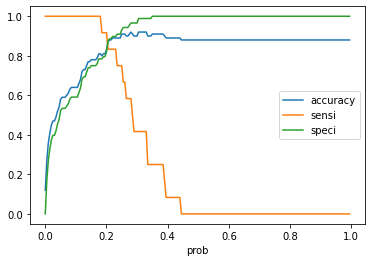

In [ ]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
# Optimum probability value is 0.19

y_pred_final['predicted'] = y_pred_final.Result_Prob.map(lambda x: 1 if x > 0.19 else 0)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_final.Result, y_pred_final.predicted )

cm


from sklearn.metrics import accuracy_score

accuracy_train=accuracy_score(y, y_pred_final.predicted)


TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
SENS=TP / float(TP+FN)

# Let us calculate specificity
SPEC=TN / float(TN+FP)

In [ ]:
SENS

0.9166666666666666

In [ ]:
SPEC

0.7954545454545454